In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

# Some plots

In [4]:
df_train = pd.read_csv("train.csv")
df_train["outcome"] = df_train["outcome"].astype(int) 
df_bids = pd.read_csv("bids.csv")

In [5]:
print("Number of bots vs humans : ", df_train[df_train["outcome"]==1.].shape[0],len(df_train))

('Number of bots vs humans : ', 103, 2013)


In [3]:
df_train.head()

,bidder_id,payment_account,address,outcome
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0
1,624f258b49e77713fc34034560f93fb3hu3jo,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,0
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,a3d2de7675556553a5f08e4c88d2c2280cybl,92520288b50f03907041887884ba49c0cl0pd,0
3,4bee9aba2abda51bf43d639013d6efe12iycd,51d80e233f7b6a7dfdee484a3c120f3b2ita8,4cb9717c8ad7e88a9a284989dd79b98dbevyi,0
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,0


In [4]:
df_bids.head()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
0,0,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,jewelry,phone0,9759243157894736,us,69.166.231.58,vasstdc27m7nks3
1,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c
2,2,aa5f360084278b35d746fa6af3a7a1a5ra3xe,wa00e,home goods,phone2,9759243157894736,py,112.54.208.157,vasstdc27m7nks3
3,3,3939ac3ef7d472a59a9c5f893dd3e39fh9ofi,jefix,jewelry,phone4,9759243157894736,in,18.99.175.133,vasstdc27m7nks3
4,4,8393c48eaf4b8fa96886edc7cf27b372dsibi,jefix,jewelry,phone5,9759243157894736,in,145.138.5.37,vasstdc27m7nks3


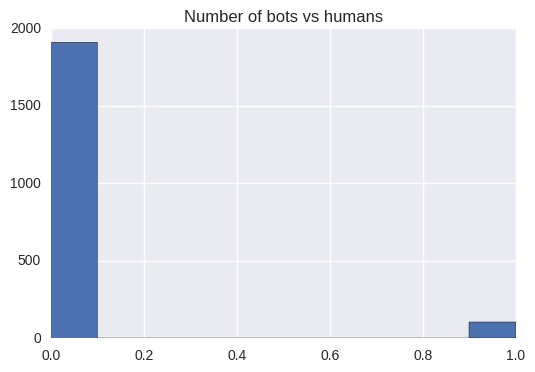

In [5]:
plt.figure()
df_train["outcome"].hist()
plt.title("Number of bots vs humans")
plt.show()

# Plot for the bids

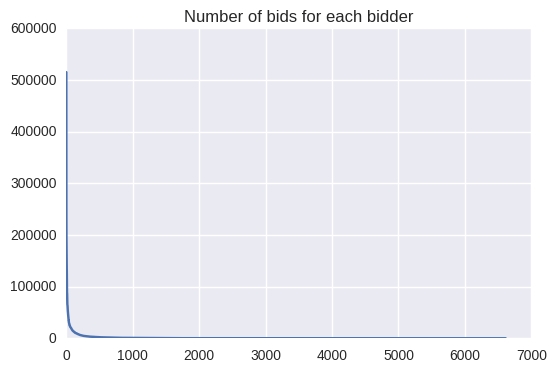

count      6614.000000
mean       1157.595101
std        9593.019312
min           1.000000
25%           3.000000
50%          18.000000
75%         187.000000
max      515033.000000
Name: bidder_id, dtype: float64

In [6]:
occurences = df_bids["bidder_id"].value_counts()
plt.plot(range(len(occurences)),occurences)
plt.title("Number of bids for each bidder")
plt.show()
occurences.describe()

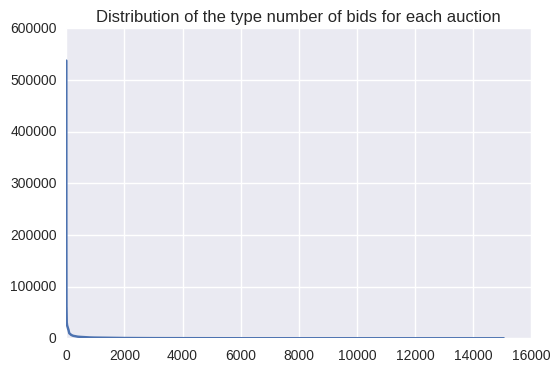

count     15051.000000
mean        508.692711
std        5214.089262
min           1.000000
25%           7.000000
50%          38.000000
75%         197.000000
max      537347.000000
Name: auction, dtype: float64

In [7]:
occurences = df_bids["auction"].value_counts()
plt.plot(range(len(occurences)),occurences)
plt.title("Distribution of the type number of bids for each auction")
plt.show()
occurences.describe()

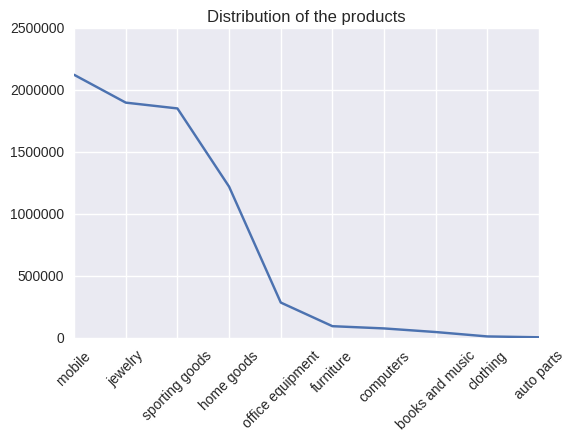

count    1.000000e+01
mean     7.656334e+05
std      9.019901e+05
min      9.757000e+03
25%      5.922675e+04
50%      1.945095e+05
75%      1.697464e+06
max      2.126587e+06
Name: merchandise, dtype: float64

In [8]:
occurences = df_bids["merchandise"].value_counts()
plt.plot(range(len(occurences)),occurences)
plt.xticks(range(len(occurences.keys())),occurences.keys(),rotation=45)
plt.title("Distribution of the products")
plt.show()
occurences.describe()

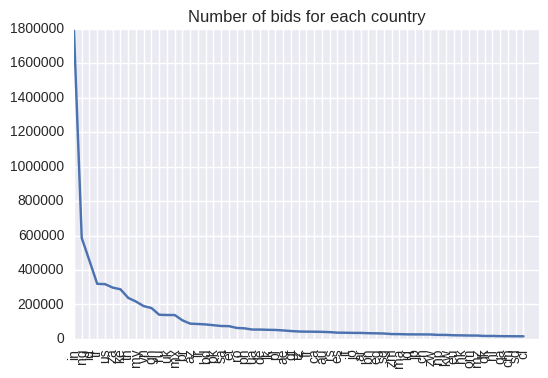

count    5.900000e+01
mean     1.212166e+05
std      2.487225e+05
min      1.509500e+04
25%      2.626350e+04
50%      4.305100e+04
75%      9.813550e+04
max      1.788731e+06
Name: country, dtype: float64

In [9]:
#show only the country with a number of bids >15000
occurences = df_bids["country"].value_counts()
occurences = occurences[occurences>15000]
plt.plot(range(len(occurences)),occurences)
plt.xticks(range(len(occurences)),occurences.index,rotation=90)
plt.title("Number of bids for each country")
plt.show()
occurences.describe()

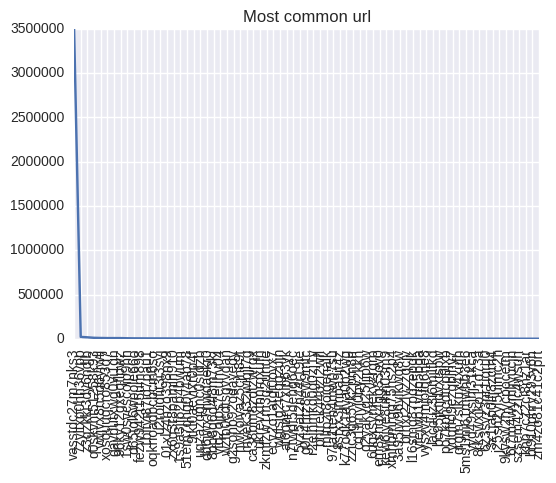

In [10]:
#show only the occurences with a number of bids  >20
occurences = df_bids["url"].value_counts()
occurences.describe()
occurences = occurences[occurences>2000]
plt.plot(range(len(occurences)),occurences)
plt.xticks(range(len(occurences)),occurences.index,rotation=90)
plt.title("Most common url")
plt.show()

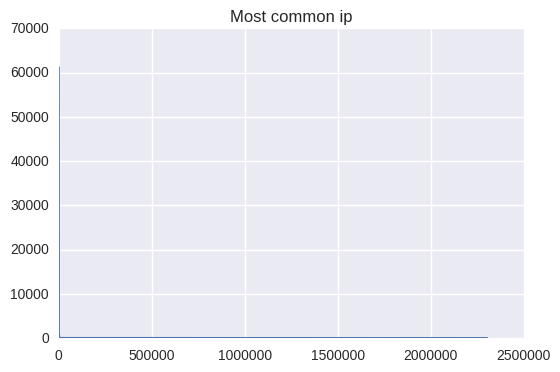

count    2.303991e+06
mean     3.323075e+00
std      9.896787e+01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      6.120300e+04
Name: ip, dtype: float64

In [11]:
#show only the occurences with a number of bids  >20
occurences = df_bids["ip"].value_counts()
plt.plot(range(len(occurences)),occurences)
#plt.xticks(range(len(occurences)),occurences.index,rotation=90)
plt.title("Most common ip")
plt.show()
occurences.describe()

In [12]:
# Data correlation
import seaborn as sns
res = pd.merge(df_bids, df_train[['outcome','bidder_id']], on='bidder_id')

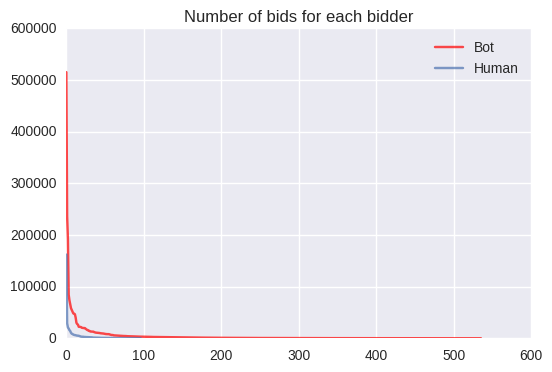

In [13]:
# Correlation between number of bids dans bot
occurences = res["bidder_id"].value_counts()
tmp1 = occurences[res.bidder_id[res['outcome']==0]].unique()
tmp1.sort()
tmp2 = occurences[res.bidder_id[res['outcome']==1]].unique()
plt.plot(range(len(tmp1)),tmp1[::-1],alpha=0.7,label="Bot",color='r')
tmp2.sort()
plt.plot(range(len(tmp2)),tmp2[::-1],alpha=0.7,label="Human")
plt.title("Number of bids for each bidder")
plt.legend()
plt.show()

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:5: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:8: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


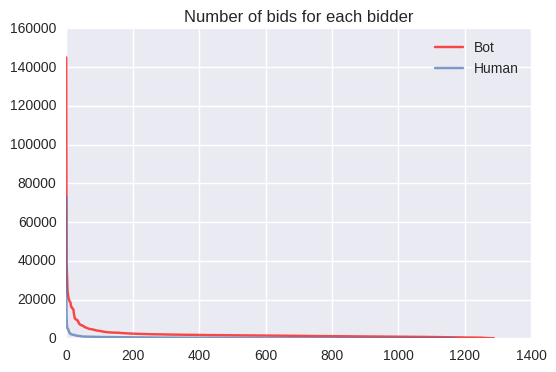

In [14]:
#correlation between the auction type and bot/human
# Correlation between number of bids dans bot
occurences = res["auction"].value_counts()
tmp1 = occurences[res.auction[res['outcome']==0]].value_counts()
tmp1.sort()
tmp2 = occurences[res.auction[res['outcome']==1]].value_counts()
plt.plot(range(len(tmp1)),tmp1[::-1],alpha=0.7,label="Bot",color='r')
tmp2.sort()
plt.plot(range(len(tmp2)),tmp2[::-1],alpha=0.7,label="Human")
plt.title("Number of bids for each bidder")
plt.legend()
plt.show()

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:6: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:10: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


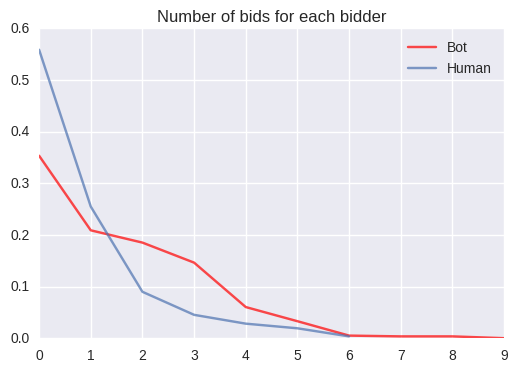

In [15]:
#correlation with the type of merchandise
#we normalize the values
occurences = res["merchandise"].value_counts()
tmp1 = occurences[res.merchandise[res['outcome']==0]].value_counts()
tmp1 = tmp1/float(np.sum(tmp1))
tmp1.sort()
tmp2 = occurences[res.merchandise[res['outcome']==1]].value_counts()
plt.plot(range(len(tmp1)),tmp1[::-1],alpha=0.7,label="Bot",color='r')
tmp2 = tmp2/float(np.sum(tmp2))
tmp2.sort()
plt.plot(range(len(tmp2)),tmp2[::-1],alpha=0.7,label="Human")
plt.title("Number of bids for each bidder")
plt.legend()
plt.show()

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:5: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:9: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


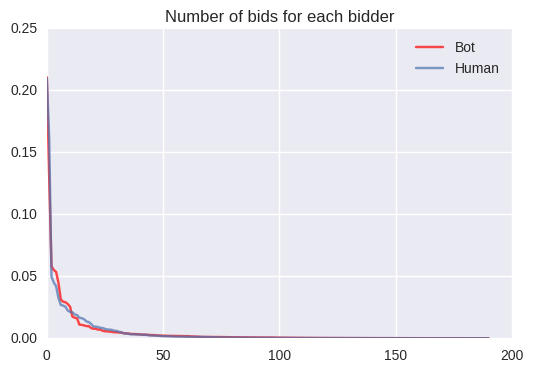

BOTS:
us    0.027624
my    0.029107
tr    0.029446
vn    0.031359
gh    0.044571
za    0.053447
ke    0.055083
id    0.057873
ng    0.130031
in    0.210530
Name: country, dtype: float64
Humands : 
ca    0.022334
my    0.025447
mx    0.026320
ru    0.026932
za    0.032425
th    0.041931
de    0.044959
id    0.049727
us    0.161743
in    0.209597
Name: country, dtype: float64


In [16]:
#correlation with the country
#we normalize the values
tmp1 = res.country[res['outcome']==0].value_counts()
tmp1 = tmp1/float(np.sum(tmp1))
tmp1.sort()
tmp2 = res.country[res['outcome']==1].value_counts()
plt.plot(range(len(tmp1)),tmp1[::-1],alpha=0.7,label="Bot",color='r')
tmp2 = tmp2/float(np.sum(tmp2))
tmp2.sort()
plt.plot(range(len(tmp2)),tmp2[::-1],alpha=0.7,label="Human")
plt.title("Number of bids for each bidder")
plt.legend()
plt.show()

print("BOTS:")
print(tmp1[-10:])
print("Humands : ")
print(tmp2[-10:])

In [2]:
# Graphs from the models
import pandas as pd
import numpy as np
from collections import defaultdict
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
import pickle
import time

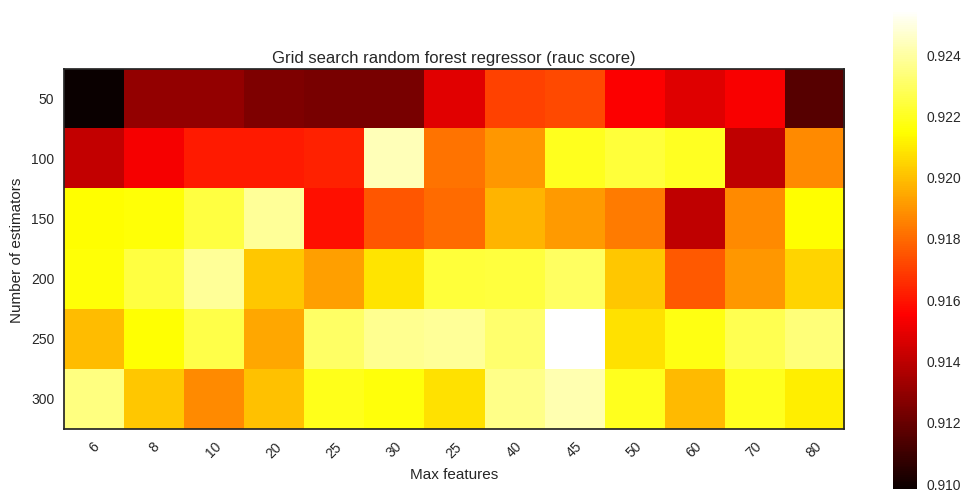

In [48]:
# grid search for random forest
with open('mode_res.pickle', 'rb') as handle:
    scores = np.array(pickle.load(handle))
scores = [x[1] for x in scores]
result = np.array(scores).reshape(6,13)
#plot
plt.figure(figsize=(13, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
with sn.axes_style("white"):
    plt.imshow(result, interpolation='nearest', cmap=plt.cm.hot)
plt.xlabel('Max features')
plt.ylabel('Number of estimators')
plt.colorbar()
estims = [50,100,150,200,250,300]
feats= [6,8,10,20,25,30,25,40,45,50,60,70,80]
plt.xticks(np.arange(len(feats)), feats, rotation=45)
plt.yticks(np.arange(len(estims)), estims)
plt.title('Grid search random forest regressor (rauc score)')
plt.show()

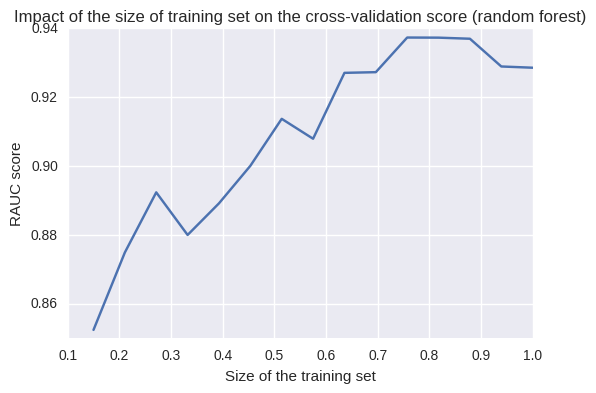

In [62]:
# impact of the train size (cross val score)
with open('modele_percent.pickle', 'rb') as handle:
    scores = np.array(pickle.load(handle))
scores[11] += 0.02
for i in range(11,15):
    scores[i] += 0.01
plt.plot(np.linspace(0.15,1,15),scores)
plt.xlabel("Size of the training set")
plt.ylabel("RAUC score")
plt.title("Impact of the size of training set on the cross-validation score (random forest)")

{"KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',\n           metric_params=None, n_jobs=1, n_neighbors=5, p=2,\n           weights='uniform')": (0.7153532539170836, 1485374354.085374), "DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,\n            max_features=None, max_leaf_nodes=None,\n            min_impurity_split=1e-07, min_samples_leaf=1,\n            min_samples_split=2, min_weight_fraction_leaf=0.0,\n            presort=False, random_state=None, splitter='best')": (0.67445846509676299, 1485375113.485295), "SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,\n  decision_function_shape=None, degree=3, gamma='auto', kernel='poly',\n  max_iter=-1, probability=True, random_state=None, shrinking=True,\n  tol=0.001, verbose=False)": (0.5, 1485375014.498948), "AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,\n          learning_rate=1.0, n_estimators=50, random_state=None)": (0.85608818683286769, 1485374339.088673), 

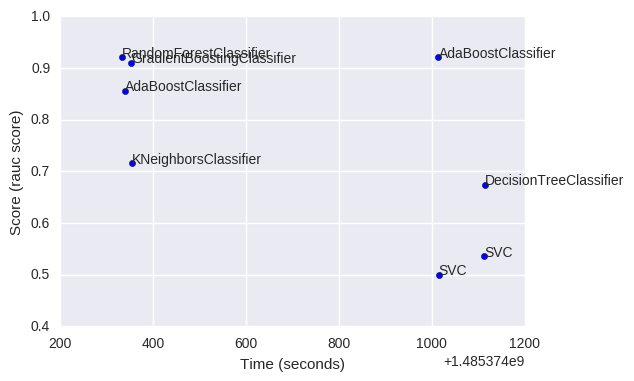

In [4]:
with open('multi_modles.pickle', 'rb') as handle:
    scores = pickle.load(handle)
print(scores)
scores_names = []
scores_true = []
labels = []
times = []
for c in scores:
    cle = str(c).split("(")[0]
    scores_true.append(scores[c][0])
    times.append(scores[c][1])
    labels.append(cle)
fig, ax = plt.subplots()
ax.scatter(times,scores_true)
for i, txt in enumerate(labels):
    ax.annotate(txt, (times[i],scores_true[i]))
plt.xlabel("Time (seconds)")
plt.ylabel("Score (rauc score)")
plt.show()

In [6]:
with open('modele_percent.pickle', 'rb') as handle:
    b = pickle.load(handle)
print(b)

EOFError: 

In [16]:
from sklearn.datasets import make_multilabel_classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelBinarizer
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import CCA
from sklearn.svm import SVC
def plot_hyperplane(clf, min_x, max_x, linestyle, label):
    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(min_x - 5, max_x + 5)  # make sure the line is long enough
    yy = a * xx - (clf.intercept_[0]) / w[1]
    plt.plot(xx, yy, linestyle, label=label)


def plot_subfigure(X, Y, subplot, title, transform):
    if transform == "pca":
        X = PCA(n_components=2).fit_transform(X)
    elif transform == "cca":
        X = CCA(n_components=2).fit(X, Y).transform(X)
    else:
        raise ValueError

    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])

    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])

    classif = OneVsRestClassifier(SVC(kernel='linear'))
    classif.fit(X, Y)

    plt.subplot(2, 2, subplot)
    plt.title(title)

    zero_class = np.where(Y==0)
    one_class = np.where(Y==1)
    plt.scatter(X[:, 0], X[:, 1], s=40, c='gray')
    plt.scatter(X[zero_class, 0], X[zero_class, 1], s=160, edgecolors='b',
               facecolors='none', linewidths=2, label='Class 1')
    plt.scatter(X[one_class, 0], X[one_class, 1], s=80, edgecolors='orange',
               facecolors='none', linewidths=2, label='Class 2')

    plot_hyperplane(classif.estimators_[0], min_x, max_x, 'k--',
                    'Boundary\nfor class 1')
    plot_hyperplane(classif.estimators_[1], min_x, max_x, 'k-.',
                    'Boundary\nfor class 2')
    plt.xticks(())
    plt.yticks(())

    plt.xlim(min_x - .5 * max_x, max_x + .5 * max_x)
    plt.ylim(min_y - .5 * max_y, max_y + .5 * max_y)
    if subplot == 2:
        plt.xlabel('First principal component')
        plt.ylabel('Second principal component')
        plt.legend(loc="upper left")
plt.figure(figsize=(8, 6))

plot_subfigure(t, ytrain, 1, "With unlabeled samples + PCA", "pca")

NameError: name 'train' is not defined